### SETUP


### Import all the neccesary packages & Libraries that are used in the machine learning classification and Regression Problems.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# IRIS DATASET CLASSIFICATION MODEL

### Import Data

In [2]:
df = pd.read_csv('/Users/amukantireddy/Downloads/Iris (1).csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.shape

(150, 6)

In [6]:
df.Species.nunique()

3

In [7]:
df = df.iloc[:,1:]

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## PREPROCESS DATA

#### As we can see the categorical values in the dataset for working on any machine learning classification model the data should be numerical , if not we should encode them into numerical using sklearn.LabelEncoder().

In [10]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"].astype(str)) # encode each categorical column


##### Here we have three different types of species and that have been distinguised as 0,1 and 2 (0='Iris-setosa',1='Iris-versicolor',2='Iris-virginica')

In [11]:

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.Species.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

## Train and Test Datasets

In [13]:
X = df.values
y = df.Species.values

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.2)
len(X_train),len(X_test),len(y_train),len(y_test)

(120, 30, 120, 30)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training a model

### Random Forest Classifier

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

1.0

### k-nearest neighbors (KNN)

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

### Logistic Regression 

In [17]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

1.0

### Decision Tree Classifier

In [22]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
dc.score(X_test,y_test)

1.0

### Implementing Cross Validation Score

In [27]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

models = [rf, dc, knn, lr]
typeModels = ["Random Forest", "Decision Tree", "KNN", "Logistic Regression"]

for i,v in enumerate(models):
    cv_acc = cross_val_score(v,X,y,scoring='accuracy',cv=10)
    print(f"{typeModels[i]} cross-val accuracy (mean):{np.mean(cv_acc)*100:.2f}%")



Random Forest cross-val accuracy (mean):100.00%
Decision Tree cross-val accuracy (mean):100.00%
KNN cross-val accuracy (mean):100.00%
Logistic Regression cross-val accuracy (mean):100.00%


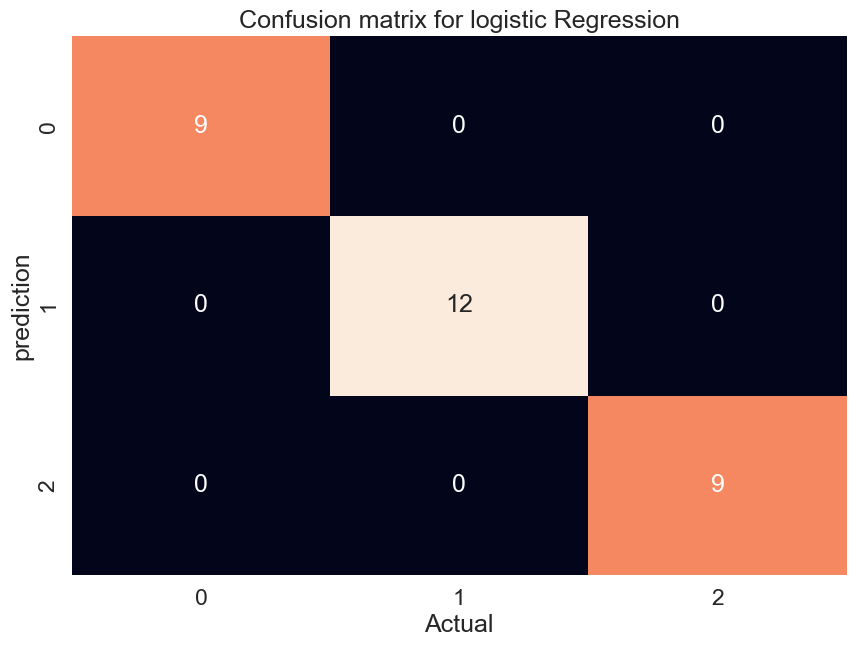

In [31]:
sns.set(font_scale=1.5)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
def plot_conf_mat(y_test,y_pred):
    fig,ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
    plt.xlabel("Actual")
    plt.ylabel("prediction")
    plt.title("Confusion matrix for logistic Regression")
plot_conf_mat(y_test,y_pred)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
dct_cr = classification_report(y_test,y_pred,output_dict=True)
df_cr = pd.DataFrame(dct_cr)
df_cr = df_cr.iloc[:-1,4:5]
df_cr

,macro avg
precision,1.0
recall,1.0
f1-score,1.0


In [39]:
lr_acc = accuracy_score(y_test,y_pred)
df_cr.loc[len(df_cr)] = {'macro avg': lr_acc}  # Add the new row at the end using its index
df_cr.index = ["Precision","recall","f1_score","Accuracy"]
df_cr.drop(df_cr.index[2],inplace=True)

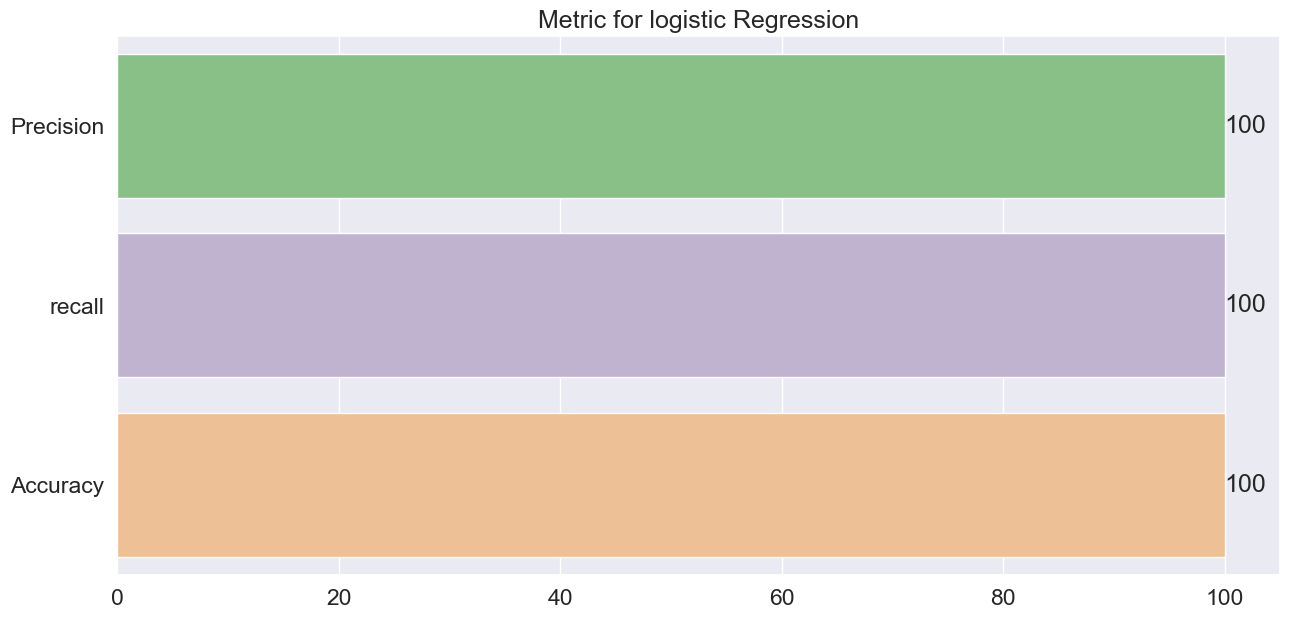

In [42]:
df_cr["macro avg"] = np.around(df_cr['macro avg'],decimals=2)
plt.figure(figsize=(15,7))
ax = sns.barplot(y=df_cr["macro avg"].index,x=df_cr["macro avg"].values*100,palette="Accent")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Metric for logistic Regression")
plt.show()

###      

###      